In [ ]:
from lucifex.sim import integrate
from lucifex.fdm import FD, CN, AB, AM
from lucifex.viz import plot_line, plot_colormap, plot_cross_section, plot_mesh
from lucifex.utils import where_on_grid
from simulate import carbon_dissolution


RA = 1000
DA = 100
NX = 80
NY = 80

T_STOP = 8.0
N_STOP = 500
DT_INIT = 1E-6
N_INIT = 5

advection_scheme = (AB(2), CN)
diffusion_scheme = CN


simulations = {}

for stabilization in (None, 'dg'):
    sim = carbon_dissolution(store_step=0.01)(
        Ra=RA, Da=DA, Nx=NX, Ny=NY,
        advection_scheme=advection_scheme, 
        diffusion_scheme=diffusion_scheme, 
        c_bounds=(False, False), stabilization=stabilization,
    )
    simulations[stabilization] = sim
    integrate(sim, t_stop=T_STOP, n_stop=N_STOP, dt_init=DT_INIT, n_init=N_INIT)

<class 'lucifex.fdm.series.FunctionSeries'>
<class 'lucifex.fem.function.StaticFunction'>


UnboundLocalError: local variable 'shape' referenced before assignment

: 

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

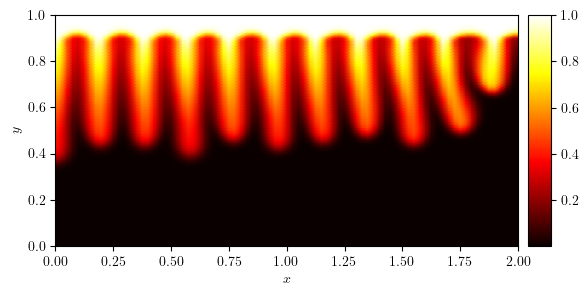

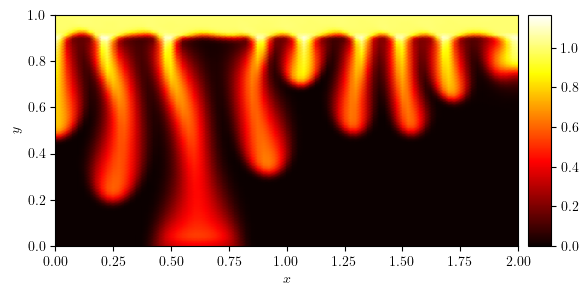

In [4]:
plot_colormap(simulations[None]['c'].series[-1])
plot_colormap(simulations['dg']['c'].series[-1])

In [ ]:
plot_colormap(c.series[0])
plot_colormap(c.series[1])
plot_colormap(c.series[2])
plot_colormap(c.series[-2])
plot_colormap(c.series[-1])

In [ ]:
import matplotlib.pyplot as plt
import io 
import tempfile
from PIL import Image

c = simulation['c']

fig1, ax1 = plot_colormap(c.series[0])
fig2, ax2 = plot_colormap(c.series[4])
fig3, ax3 = plot_colormap(c.series[-1])

fig1.savefig('temp1.jpg')
fig2.savefig('temp2.jpg')
fig3.savefig('temp3.jpg')


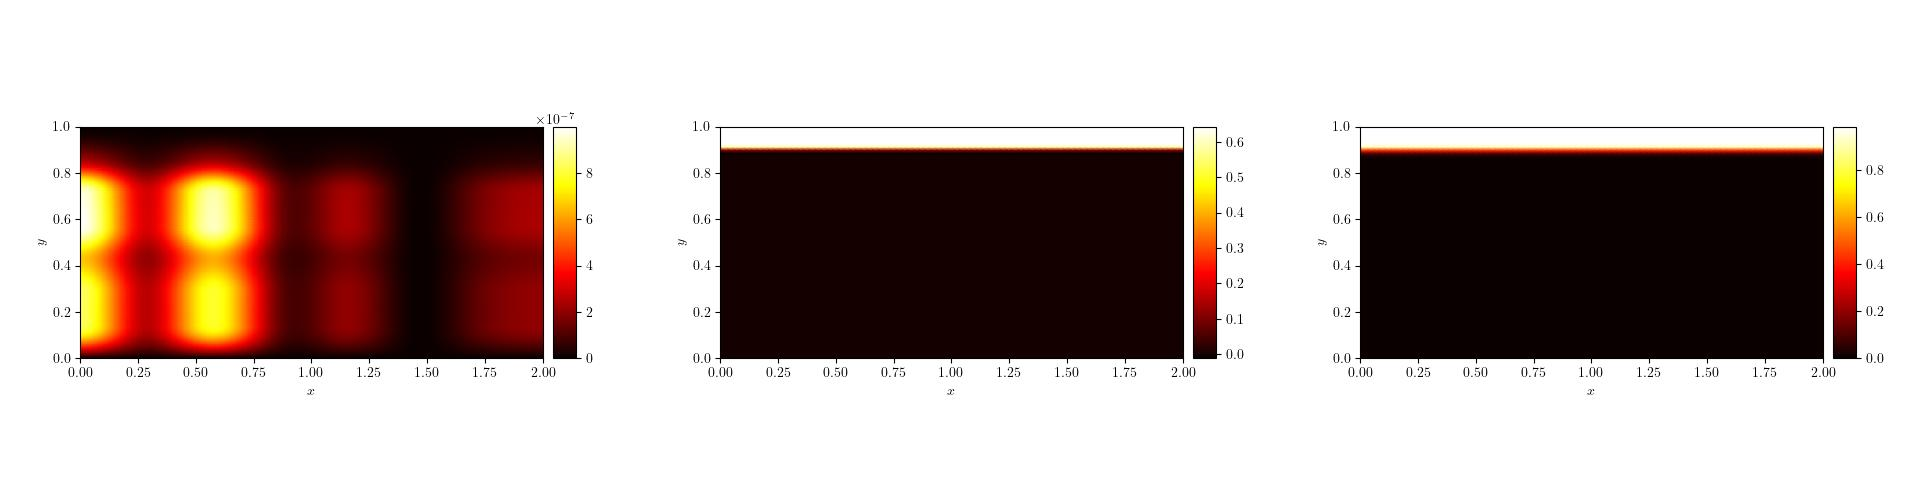

In [ ]:
images = [Image.open(i) for i in ['temp1.jpg', 'temp2.jpg', 'temp3.jpg']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for i in images:
  im.paste(i, (x_offset, 0))
  x_offset += i.size[0]

im

In [13]:
widths, heights

((640, 640, 640), (480, 480, 480))

In [ ]:
x_spurious, y_spurious = where_on_grid(c.series[-1], lambda c: c < 0)

fig, ax = plot_colormap(c.series[-1])
ax.scatter(x_spurious, y_spurious)

In [ ]:
plot_colormap(c.series[50])
plot_colormap(c.series[100])
plot_colormap(c.series[150])
plot_colormap(c.series[200])
plot_colormap(c.series[300])
plot_colormap(c.series[400])

In [ ]:
s = simulation['S']

plot_colormap(s.series[0])
plot_colormap(s.series[1])
plot_colormap(s.series[2])
plot_colormap(s.series[-1])

In [ ]:
umax = simulation['umax']
plot_line((umax.time_series, umax.value_series))

In [ ]:
cminmax = simulation['cminmax']
plot_line((cminmax.time_series, [i[0] for i in cminmax.value_series]))
plot_line((cminmax.time_series, [i[1] for i in cminmax.value_series]))

In [ ]:
dt = simulation['dt']
c = simulation['c']
umax = simulation['umax']
cminmax = simulation['cminmax']
Sminmax = simulation['Sminmax']

plot_colormap(simulation['c'][-1])
plot_line((umax.time_series, [i for i in umax.value_series]))
plot_line((cminmax.time_series, [i[1] for i in cminmax.value_series]))
plot_line((cminmax.time_series, [i[0] for i in cminmax.value_series]))
plot_line((Sminmax.time_series, [i[0] for i in Sminmax.value_series]))

In [ ]:
plot_line((cminmax.time_series[:50], [i[1] for i in cminmax.value_series][:50]))

In [ ]:
[i[1] for i in cminmax.value_series]

In [ ]:
from lucifex.sim import integrate
from lucifex.viz import plot_line, plot_colormap
from simulate import carbon_dissolution


RA = 5000
DA = 100
# NCELL = (100, 150, 200)
NCELL = (150,)
SUPG = (None, 'codina', 'shakib')
# NX_NY = {i for j in [((n, n), (min(NCELL), n), (n, min(NCELL))) for n in NCELL] for i in j}

T_STOP = 10.0
N_STOP = None
DT_INIT = 1E-6
N_INIT = 15

for supg in (None, 'codina', 'shakib'):
    for n in NCELL:
        simulation = carbon_dissolution(
                            store_step=1, 
                            write_step=None, 
                            file_name=('FunctionSeries', 'ConstantSeries'),
                            dir_base='./data/mesh_resolution',
                            dir_labels=('Nx', 'Nx', 'supg'),
                            dir_timestamp=True,
                        )(Ra=RA, Da=DA, Nx=n, Ny=n, supg=supg)
        integrate(simulation, t_stop=T_STOP, n_stop=N_STOP, dt_init=DT_INIT, n_init=N_INIT)
        plot_colormap(simulation['c'][-1])

In [ ]:
from lucifex.fdm import AB, CN
from lucifex.sim import integrate
from simulate import carbon_dissolution


RA = 5000
DA = 1000
NCELL = (100, 150, 200)
SUPG = (None, 'codina', 'shakib')
NX_NY = {i for j in [((n, n), (min(NCELL), n), (n, min(NCELL))) for n in NCELL] for i in j}

T_STOP = 12.0
N_STOP = None
DT_INIT = 1E-6
N_INIT = 15

for supg in (None, 'codina', 'shakib'):
    for (nx, ny) in NX_NY:
        simulation = carbon_dissolution(
                            store_step=None, 
                            write_step=1, 
                            file_name=('FunctionSeries', 'ConstantSeries'),
                            dir_base='./data/mesh_resolution',
                            dir_labels=('Nx', 'Nx', 'supg'),
                            dir_timestamp=True,
                        )(Ra=RA, Da=DA, Nx=nx, Ny=ny, supg=supg)
        integrate(simulation, t_stop=T_STOP, n_stop=N_STOP, dt_init=DT_INIT, n_init=N_INIT)